In [98]:
# Importing dependencies
import csv
import numpy as np
import pandas as pd
from datetime import datetime,date

import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.formula.api import ols


import geopandas as gpd
from shapely.geometry import Point, Polygon

import warnings
warnings.filterwarnings('ignore')


In [99]:
# Initial exploration of dataset
rat_data = pd.read_csv('Resources/Rat_Sightings.csv', low_memory=False)

## 1. Initial exploration of dataset

In [100]:
rat_data.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location
0,36258648,05/23/2017 12:00:00 AM,06/01/2017 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Apt. Building,11385.0,1737 WILLOUGHBY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708279,-73.918762,"(40.70827884615599, -73.91876178147548)"
1,36258650,05/23/2017 12:00:00 AM,07/06/2017 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,Construction Site,11238.0,820 WASHINGTON AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.673394,-73.962926,"(40.673393560937974, -73.9629260422388)"
2,32989859,03/25/2016 12:00:00 AM,04/05/2016 12:24:24 PM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,Vacant Lot,10473.0,319 WHITE PLAINS ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.812046,-73.855925,"(40.81204563877927, -73.85592527378644)"
3,33287723,05/05/2016 12:00:00 AM,05/10/2016 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,1-2 Family Dwelling,10308.0,96 CRANFORD STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.551770,-74.139026,"(40.55177043984348, -74.13902622249373)"
4,35161193,01/03/2017 12:00:00 AM,01/27/2017 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,Other (Explain Below),11217.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.679734,-73.974312,"(40.67973435074979, -73.97431183772623)"


In [101]:
# Finding range of dates for all incidents
max_date = rat_data['Created Date'].max()
min_date = rat_data['Created Date'].min()
print(f'Dataset starts from {min_date} to {max_date}')

Dataset starts from 01/01/2010 02:15:27 PM to 12/31/2018 12:00:00 AM


In [102]:
# Determing the number of rows and columns in dataset
row_col = rat_data.shape
print(f'Dataset contains {row_col[0]} rows and {row_col[1]} columns')

Dataset contains 131004 rows and 38 columns


In [103]:
# Determing labels for each column
rat_data.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Action Updated Date', 'Community Board', 'Borough',
       'X Coordinate (State Plane)', 'Y Coordinate (State Plane)',
       'Park Facility Name', 'Park Borough', 'Vehicle Type',
       'Taxi Company Borough', 'Taxi Pick Up Location', 'Bridge Highway Name',
       'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment',
       'Latitude', 'Longitude', 'Location'],
      dtype='object')

In [104]:
rat_data.describe()

,Unique Key,Incident Zip,Facility Type,X Coordinate (State Plane),Y Coordinate (State Plane),Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude
count,1.310040e+05,130571.000000,0.0,1.300880e+05,130088.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,130088.000000,130088.000000
mean,3.077473e+07,10736.577686,NaN,1.002456e+06,208423.435259,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.738711,-73.934268
std,7.260366e+06,616.453853,NaN,1.931141e+04,29771.546960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.081717,0.069649
min,1.146439e+07,83.000000,NaN,9.134950e+05,121350.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.499502,-74.254437
25%,2.503035e+07,10128.000000,NaN,9.936030e+05,186796.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.679355,-73.966226
50%,3.148675e+07,10473.000000,NaN,1.001240e+06,203196.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.724383,-73.938665
75%,3.674720e+07,11223.000000,NaN,1.011904e+06,235950.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.814277,-73.900099
max,4.292348e+07,100354.000000,NaN,1.067019e+06,271876.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.912869,-73.701326


For our analysis we're interested in the following columns:

- "Unique Key": entry for each incident of rodent sighting
- "Created Date": date of each incident
- "Location Type": dwelling where incident occurs
- "'Incident Zip'": zip code of incident
- "'Borough'": borough where incident occurs
- "X Coordinate (State Plane)": x coordinate of state map of each incident
- "Y Coordinate (State Plane)": y coordinate of sate map of each incident
- "Latitude": latitude of each incident
- "Longitude": longitude of each incident

**Also we'll remove all rows with missing or incorrectly formatted values**

## 2. Data cleaning

In [105]:
# Removing time entry of each incident and keeping only the date
rat_data['Created Date'] = pd.to_datetime(rat_data['Created Date']).dt.date

# Removing unecessary columns
rat_data = rat_data.drop(['Closed Date', 
                         'Agency', 
                         'Incident Address', 
                         'Street Name', 
                         'Cross Street 1', 
                         'Cross Street 2', 
                         'Intersection Street 1', 
                         'Intersection Street 2', 
                         'Address Type', 
                         'Landmark', 
                         'Facility Type', 
                         'Status', 
                         'Due Date', 
                         'Resolution Action Updated Date', 
                         'Community Board', 
                         'Park Facility Name', 
                         'Park Borough', 
                         'Vehicle Type', 
                         'Taxi Company Borough', 
                         'Taxi Pick Up Location', 
                         'Bridge Highway Name',
                         'Bridge Highway Direction', 
                         'Road Ramp', 
                         'Bridge Highway Segment', 
                         'City', 
                         'Location',
                         'Agency Name'], 
                         axis=1)

# Renaming columns for clarity
rat_data.rename(columns={'Unique Key': 'Incident ID', 
                         'Created Date': 'Sighting Date', 
                         'Descriptor': 'Incident'}, inplace=True)

rat_data.head()

,Incident ID,Sighting Date,Complaint Type,Incident,Location Type,Incident Zip,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Latitude,Longitude
0,36258648,2017-05-23,Rodent,Rat Sighting,3+ Family Apt. Building,11385.0,QUEENS,1006773.0,197332.0,40.708279,-73.918762
1,36258650,2017-05-23,Rodent,Rat Sighting,Construction Site,11238.0,BROOKLYN,994534.0,184614.0,40.673394,-73.962926
2,32989859,2016-03-25,Rodent,Rat Sighting,Vacant Lot,10473.0,BRONX,1024132.0,235160.0,40.812046,-73.855925
3,33287723,2016-05-05,Rodent,Rat Sighting,1-2 Family Dwelling,10308.0,STATEN ISLAND,945615.0,140332.0,40.551770,-74.139026
4,35161193,2017-01-03,Rodent,Rat Sighting,Other (Explain Below),11217.0,BROOKLYN,991375.0,186923.0,40.679734,-73.974312


In [106]:
# Finding missing values in columns of interest

missing_date = rat_data['Sighting Date'].isna().sum()
missing_zip = rat_data['Incident Zip'].isna().sum()
missing_borough = rat_data['Borough'].isna().sum()
missing_latitude = rat_data['Latitude'].isna().sum()
missing_longitude = rat_data['Longitude'].isna().sum()

print('Missing values from the dataset')
print('-------------------------------')
print(f'Date: {missing_date}')
print(f'Zip: {missing_zip}')
print(f'Borough: {missing_borough}')
print(f'Latitude: {missing_latitude}')
print(f'Longitude: {missing_longitude}')

Missing values from the dataset
-------------------------------
Date: 0
Zip: 433
Borough: 0
Latitude: 916
Longitude: 916


In [107]:
# Since we're interested in location data, we'll drop rows with missing values
complete_rat_data = rat_data.dropna()

In [108]:
# Confirming dropping of rows with missing values
missing_date = complete_rat_data['Sighting Date'].isna().sum()
missing_zip = complete_rat_data['Incident Zip'].isna().sum()
missing_borough = complete_rat_data['Borough'].isna().sum()
missing_latitude = complete_rat_data['Latitude'].isna().sum()
missing_longitude = complete_rat_data['Longitude'].isna().sum()

print('Missing values from the dataset')
print('-------------------------------')
print(f'Date: {missing_date}')
print(f'Zip: {missing_zip}')
print(f'Borough: {missing_borough}')
print(f'Latitude: {missing_latitude}')
print(f'Longitude: {missing_longitude}')

Missing values from the dataset
-------------------------------
Date: 0
Zip: 0
Borough: 0
Latitude: 0
Longitude: 0


In [109]:
# Reformatting borough names
# Reformattiing zip column

complete_rat_data['Borough'] = complete_rat_data['Borough'].str.lower()
complete_rat_data['Borough'] = complete_rat_data['Borough'].str.title()

complete_rat_data['Incident Zip'] = complete_rat_data['Incident Zip'].round(0).astype(int)

complete_rat_data.head()

,Incident ID,Sighting Date,Complaint Type,Incident,Location Type,Incident Zip,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Latitude,Longitude
0,36258648,2017-05-23,Rodent,Rat Sighting,3+ Family Apt. Building,11385,Queens,1006773.0,197332.0,40.708279,-73.918762
1,36258650,2017-05-23,Rodent,Rat Sighting,Construction Site,11238,Brooklyn,994534.0,184614.0,40.673394,-73.962926
2,32989859,2016-03-25,Rodent,Rat Sighting,Vacant Lot,10473,Bronx,1024132.0,235160.0,40.812046,-73.855925
3,33287723,2016-05-05,Rodent,Rat Sighting,1-2 Family Dwelling,10308,Staten Island,945615.0,140332.0,40.551770,-74.139026
4,35161193,2017-01-03,Rodent,Rat Sighting,Other (Explain Below),11217,Brooklyn,991375.0,186923.0,40.679734,-73.974312


In [110]:
complete_rat_data.columns

Index(['Incident ID', 'Sighting Date', 'Complaint Type', 'Incident',
       'Location Type', 'Incident Zip', 'Borough',
       'X Coordinate (State Plane)', 'Y Coordinate (State Plane)', 'Latitude',
       'Longitude'],
      dtype='object')

In [111]:
# Analyzing cleaned dataset
complete_rat_data.describe()

,Incident ID,Incident Zip,X Coordinate (State Plane),Y Coordinate (State Plane),Latitude,Longitude
count,1.300700e+05,130070.000000,1.300700e+05,130070.000000,130070.000000,130070.000000
mean,3.077279e+07,10736.954209,1.002456e+06,208424.138764,40.738712,-73.934267
std,7.259828e+06,563.551709,1.931146e+04,29770.998059,0.081715,0.069649
min,1.146439e+07,83.000000,9.134950e+05,121350.000000,40.499502,-74.254437
25%,2.503058e+07,10128.000000,9.936030e+05,186799.000000,40.679360,-73.966227
50%,3.148281e+07,10473.000000,1.001240e+06,203195.500000,40.724382,-73.938666
75%,3.674492e+07,11223.000000,1.011904e+06,235950.000000,40.814275,-73.900100
max,4.292348e+07,11697.000000,1.067019e+06,271876.000000,40.912869,-73.701326


In [112]:
# We can see that the zip column has one incorrectly formatted entry with a value of 83
# Since we don't know which zip code it refers to, we'll drop those rows
correct_rat_data = complete_rat_data[complete_rat_data['Incident Zip'] != 83.0]

# Confirming removal of incorrectly formatted zip code entry
correct_rat_data['Incident Zip'].describe()

count    130044.000000
mean      10739.084279
std         543.098192
min       10000.000000
25%       10128.000000
50%       10473.000000
75%       11223.000000
max       11697.000000
Name: Incident Zip, dtype: float64

In [113]:
max_date = correct_rat_data['Sighting Date'].max()
min_date = correct_rat_data['Sighting Date'].min()

row_col = correct_rat_data.shape

# Description of cleaned dataset we'll use for our analysis

print('Cleaned NYC Rat Dataset')
print('-----------------------')
print(f'Table contains {row_col[0]} rows and {row_col[1]} columns')
print(f'Dates range from {min_date} to {max_date}')

Cleaned NYC Rat Dataset
-----------------------
Table contains 130044 rows and 11 columns
Dates range from 2010-01-01 to 2019-06-10


In [114]:
# Checking borough names
correct_rat_data['Borough'].unique()

array(['Queens', 'Brooklyn', 'Bronx', 'Staten Island', 'Manhattan',
       'Unspecified'], dtype=object)

In [122]:
# Remobving 'unspecified borough'
clean_rat_data = correct_rat_data[correct_rat_data['Borough'] != 'Unspecified']
clean_rat_data['Borough'].unique()

array(['Queens', 'Brooklyn', 'Bronx', 'Staten Island', 'Manhattan'],
      dtype=object)

In [123]:
# Saving final csv for analysis
clean_rat_data.to_csv(r'clean_csv/final_rat_sightings.csv')

## 3. Data analysis

In [124]:
# Reading data file for visualization and analysis
rats_df = pd.read_csv('clean_csv/final_rat_sightings.csv')
rats_df.head()

,Unnamed: 0,Incident ID,Sighting Date,Complaint Type,Incident,Location Type,Incident Zip,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Latitude,Longitude
0,0,36258648,2017-05-23,Rodent,Rat Sighting,3+ Family Apt. Building,11385,Queens,1006773.0,197332.0,40.708279,-73.918762
1,1,36258650,2017-05-23,Rodent,Rat Sighting,Construction Site,11238,Brooklyn,994534.0,184614.0,40.673394,-73.962926
2,2,32989859,2016-03-25,Rodent,Rat Sighting,Vacant Lot,10473,Bronx,1024132.0,235160.0,40.812046,-73.855925
3,3,33287723,2016-05-05,Rodent,Rat Sighting,1-2 Family Dwelling,10308,Staten Island,945615.0,140332.0,40.551770,-74.139026
4,4,35161193,2017-01-03,Rodent,Rat Sighting,Other (Explain Below),11217,Brooklyn,991375.0,186923.0,40.679734,-73.974312


In [126]:
rats_df['Borough'].unique()

array(['Queens', 'Brooklyn', 'Bronx', 'Staten Island', 'Manhattan'],
      dtype=object)

In [127]:
# Grouping by 
rats_date = rats_df.groupby('Sighting Date').nunique()['Incident ID'].reset_index()

rats_date['Year'] = pd.DatetimeIndex(rats_date['Sighting Date']).year
rats_date.head()

,Sighting Date,Incident ID,Year
0,2010-01-01,9,2010
1,2010-01-02,12,2010
2,2010-01-03,3,2010
3,2010-01-04,23,2010
4,2010-01-05,14,2010


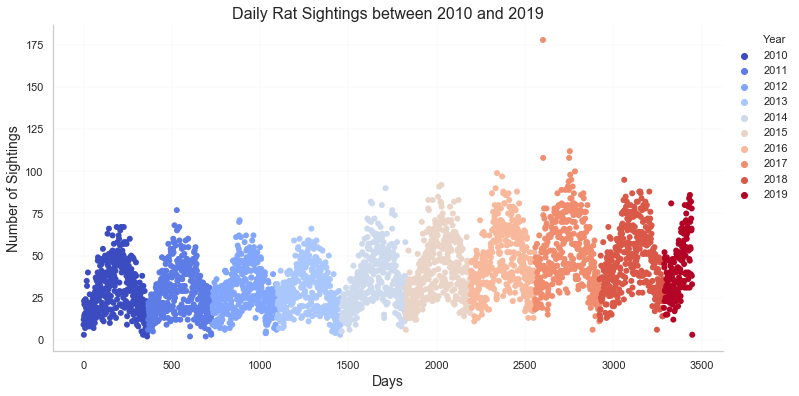

In [128]:
# Plotting a scatter plot graph showing the number of rat sightings per day
x = range(len(rats_date['Sighting Date']))
sightings = rats_date['Incident ID']
year = rats_date['Year']

dims = (12, 6)
fig, ax = plt.subplots(figsize=dims)
sns.set(style='whitegrid', rc={"grid.linewidth": 0.1})


ax = sns.scatterplot(x=x, y=sightings, data=rats_date, hue=year, 
                     palette="coolwarm", sizes=(1, 8), linewidth=0, legend='full')

ax.legend(frameon=False, bbox_to_anchor=(1, 1), loc=2,)
sns.despine(left=False, bottom=False)

ax.set_title('Daily Rat Sightings between 2010 and 2019', fontsize=16)
ax.set_ylabel('Number of Sightings', fontsize=14)
ax.set_xlabel('Days', fontsize=14)

# Saving fig
imgfile = ('Figures/daily_rat_sightings.png')
plt.savefig(imgfile, dpi=300)

In [129]:
print(rats_date.corr())
print(rats_date.cov())

             Incident ID     Year
Incident ID      1.00000  0.42379
Year             0.42379  1.00000
             Incident ID       Year
Incident ID   351.149455  21.704229
Year           21.704229   7.469550


In [130]:
# Grouping data frame by zip code
rats_zip = rats_df.groupby('Incident Zip').count().reset_index()

In [131]:
# Creating a new dataframe containing the total counts of rat sightings in each zip code
rats_by_zip = rats_zip[['Incident Zip', 'Incident ID']].copy()
rats_by_zip.rename(index=str, columns={
                    "Incident Zip": "Zip Code", 
                    "Incident ID": "Number of Sightings"
                    }, 
                   inplace=True)
rats_by_zip.head()

,Zip Code,Number of Sightings
0,10000,3
1,10001,510
2,10002,1631
3,10003,779
4,10004,55


In [132]:
# Grouping data frame by borough
rats_borough = rats_df.groupby('Borough').count().reset_index()

In [133]:
# Creating a new dataframe containing the total counts of rat sightings in each borough
rats_by_borough = rats_borough[['Borough', 'Incident ID']].copy()
rats_by_borough.rename(index=str, columns={"Incident ID": "Number of Sightings"}, inplace=True)
rats_by_borough.head()

,Borough,Number of Sightings
0,Bronx,25939
1,Brooklyn,45428
2,Manhattan,33679
3,Queens,18965
4,Staten Island,6032


In [134]:
# Opening an reading zip code boundary data with geopandas
nyc = gpd.read_file('Resources/nyc_zip_bounderies/nyc_zip_bounderies.shp')
nyc.head()

,OBJECTID,postalCode,PO_NAME,STATE,borough,ST_FIPS,CTY_FIPS,BLDGpostal,_id,longitude,latitude,geometry
0,1,11372,Jackson Heights,NY,Queens,36,081,0,http://nyc.pediacities.com/Resource/PostalCode...,-73.883573,40.751662,POLYGON ((-73.86942457284177 40.74915687096788...
1,2,11004,Glen Oaks,NY,Queens,36,081,0,http://nyc.pediacities.com/Resource/PostalCode...,-73.711608,40.745366,POLYGON ((-73.71068374074009 40.75004039450918...
2,3,11040,New Hyde Park,NY,Queens,36,081,0,http://nyc.pediacities.com/Resource/PostalCode...,-73.703443,40.748714,POLYGON ((-73.70098278625547 40.73889569923034...
3,4,11426,Bellerose,NY,Queens,36,081,0,http://nyc.pediacities.com/Resource/PostalCode...,-73.724004,40.736534,POLYGON ((-73.72270447144122 40.75373371438336...
4,5,11365,Fresh Meadows,NY,Queens,36,081,0,http://nyc.pediacities.com/Resource/PostalCode...,-73.794626,40.739903,"POLYGON ((-73.81088634744756 40.7271718757592,..."


In [135]:
# Rename columns in order to merge with rat_sighting dataframe
nyc.rename(index=str, columns={"postalCode": "Zip Code"}, inplace=True)
nyc.head()

,OBJECTID,Zip Code,PO_NAME,STATE,borough,ST_FIPS,CTY_FIPS,BLDGpostal,_id,longitude,latitude,geometry
0,1,11372,Jackson Heights,NY,Queens,36,081,0,http://nyc.pediacities.com/Resource/PostalCode...,-73.883573,40.751662,POLYGON ((-73.86942457284177 40.74915687096788...
1,2,11004,Glen Oaks,NY,Queens,36,081,0,http://nyc.pediacities.com/Resource/PostalCode...,-73.711608,40.745366,POLYGON ((-73.71068374074009 40.75004039450918...
2,3,11040,New Hyde Park,NY,Queens,36,081,0,http://nyc.pediacities.com/Resource/PostalCode...,-73.703443,40.748714,POLYGON ((-73.70098278625547 40.73889569923034...
3,4,11426,Bellerose,NY,Queens,36,081,0,http://nyc.pediacities.com/Resource/PostalCode...,-73.724004,40.736534,POLYGON ((-73.72270447144122 40.75373371438336...
4,5,11365,Fresh Meadows,NY,Queens,36,081,0,http://nyc.pediacities.com/Resource/PostalCode...,-73.794626,40.739903,"POLYGON ((-73.81088634744756 40.7271718757592,..."


In [136]:
# Checking dtypes reveals that zip code values in geo dataframe is an object
# Since objects cannot be merged with int we'll convert to int
nyc.dtypes

OBJECTID        int64
Zip Code       object
PO_NAME        object
STATE          object
borough        object
ST_FIPS        object
CTY_FIPS       object
BLDGpostal      int64
_id            object
longitude     float64
latitude      float64
geometry       object
dtype: object

In [137]:
# Converting column values to int
nyc['Zip Code']=nyc['Zip Code'].astype(int)
nyc.dtypes

OBJECTID        int64
Zip Code        int64
PO_NAME        object
STATE          object
borough        object
ST_FIPS        object
CTY_FIPS       object
BLDGpostal      int64
_id            object
longitude     float64
latitude      float64
geometry       object
dtype: object

In [138]:
# Merging dataframes on zip code
merged_zip = pd.merge(nyc, rats_by_zip, on='Zip Code')
merged_zip.head()

,OBJECTID,Zip Code,PO_NAME,STATE,borough,ST_FIPS,CTY_FIPS,BLDGpostal,_id,longitude,latitude,geometry,Number of Sightings
0,1,11372,Jackson Heights,NY,Queens,36,081,0,http://nyc.pediacities.com/Resource/PostalCode...,-73.883573,40.751662,POLYGON ((-73.86942457284177 40.74915687096788...,605
1,2,11004,Glen Oaks,NY,Queens,36,081,0,http://nyc.pediacities.com/Resource/PostalCode...,-73.711608,40.745366,POLYGON ((-73.71068374074009 40.75004039450918...,31
2,3,11040,New Hyde Park,NY,Queens,36,081,0,http://nyc.pediacities.com/Resource/PostalCode...,-73.703443,40.748714,POLYGON ((-73.70098278625547 40.73889569923034...,8
3,4,11426,Bellerose,NY,Queens,36,081,0,http://nyc.pediacities.com/Resource/PostalCode...,-73.724004,40.736534,POLYGON ((-73.72270447144122 40.75373371438336...,131
4,5,11365,Fresh Meadows,NY,Queens,36,081,0,http://nyc.pediacities.com/Resource/PostalCode...,-73.794626,40.739903,"POLYGON ((-73.81088634744756 40.7271718757592,...",109


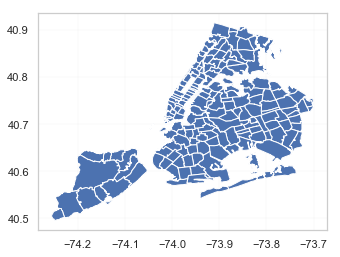

In [139]:
# Confirming that shapefile data is correct
merged_zip.plot()

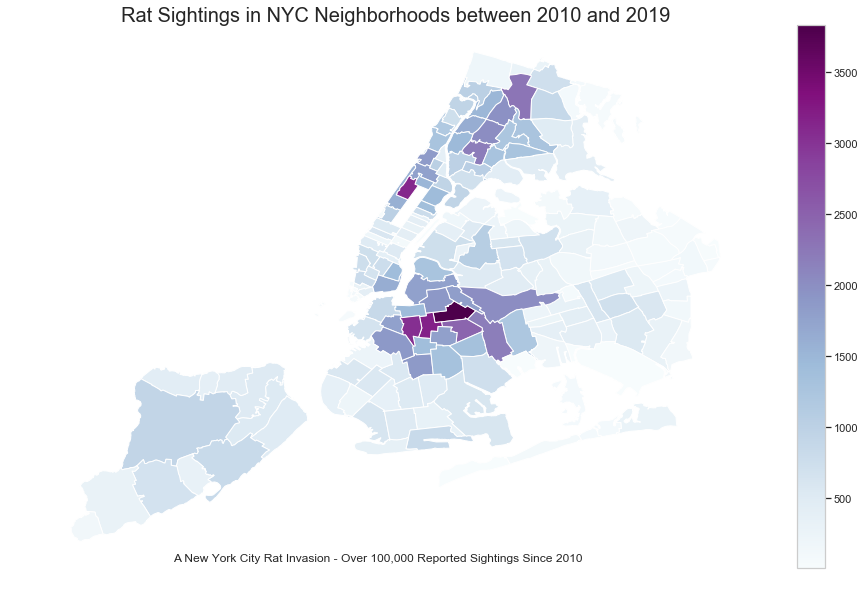

In [140]:
# Setting a variable that will the column we want to visualise on the map
sightings = merged_zip['Number of Sightings']

# Setting a parameters for the graph
colors = 10 # Number of colors to represent the data
cmap = 'BuPu'
figsize = (16, 10)
title = 'Rat Sightings in NYC Neighborhoods between 2010 and 2019'
imgfile = 'Figures/nyc_rats_sightings.png'
annotation = 'A New York City Rat Invasion - Over 100,000 Reported Sightings Since 2010'
ax = merged_zip.plot(column=sightings, cmap=cmap, figsize=figsize, k=colors, legend=True)

ax.set_title(title, fontdict={'fontsize': 20}, loc='center')
ax.annotate(annotation, xy=(0.2, 0.08), size=12, xycoords='figure fraction')

ax.set_axis_off()
#ax.set_xlim([-1.5e7, 1.7e7])
#ax.get_legend().set_bbox_to_anchor((.3, .9))
#ax.get_figure()

plt.savefig(imgfile, dpi=300)

In [141]:
# Plotting the graph by borough
# Opening and reading borough boundary data with geopandas
borough = gpd.read_file('Resources/Borough Boundaries/geo_export_ca011477-3aac-41b1-9a85-e2efd0b0a5ac.shp')
borough.head()

,boro_code,boro_name,shape_area,shape_leng,geometry
0,2.0,Bronx,1.186612e+09,462958.186921,(POLYGON ((-73.89680883223774 40.7958084451597...
1,5.0,Staten Island,1.623921e+09,330432.867999,(POLYGON ((-74.05050806403247 40.5664220341608...
2,4.0,Queens,3.044779e+09,895169.617616,(POLYGON ((-73.83668274106707 40.5949466970158...
3,1.0,Manhattan,6.365940e+08,360282.142897,(POLYGON ((-74.01092841268031 40.6844914725429...
4,3.0,Brooklyn,1.937597e+09,739911.533210,(POLYGON ((-73.86706149472118 40.5820879767934...


In [142]:
# Rename columns in order to merge with rat_sighting dataframe
borough.rename(index=str, columns={"boro_name": "Borough"}, inplace=True)
borough.head()

,boro_code,Borough,shape_area,shape_leng,geometry
0,2.0,Bronx,1.186612e+09,462958.186921,(POLYGON ((-73.89680883223774 40.7958084451597...
1,5.0,Staten Island,1.623921e+09,330432.867999,(POLYGON ((-74.05050806403247 40.5664220341608...
2,4.0,Queens,3.044779e+09,895169.617616,(POLYGON ((-73.83668274106707 40.5949466970158...
3,1.0,Manhattan,6.365940e+08,360282.142897,(POLYGON ((-74.01092841268031 40.6844914725429...
4,3.0,Brooklyn,1.937597e+09,739911.533210,(POLYGON ((-73.86706149472118 40.5820879767934...


In [143]:
merged_boro = pd.merge(borough, rats_by_borough, on='Borough')
merged_boro.head()

,boro_code,Borough,shape_area,shape_leng,geometry,Number of Sightings
0,2.0,Bronx,1.186612e+09,462958.186921,(POLYGON ((-73.89680883223774 40.7958084451597...,25939
1,5.0,Staten Island,1.623921e+09,330432.867999,(POLYGON ((-74.05050806403247 40.5664220341608...,6032
2,4.0,Queens,3.044779e+09,895169.617616,(POLYGON ((-73.83668274106707 40.5949466970158...,18965
3,1.0,Manhattan,6.365940e+08,360282.142897,(POLYGON ((-74.01092841268031 40.6844914725429...,33679
4,3.0,Brooklyn,1.937597e+09,739911.533210,(POLYGON ((-73.86706149472118 40.5820879767934...,45428


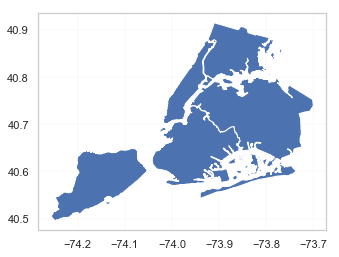

In [144]:
# Confirming that shapefile data is correct
merged_boro.plot()

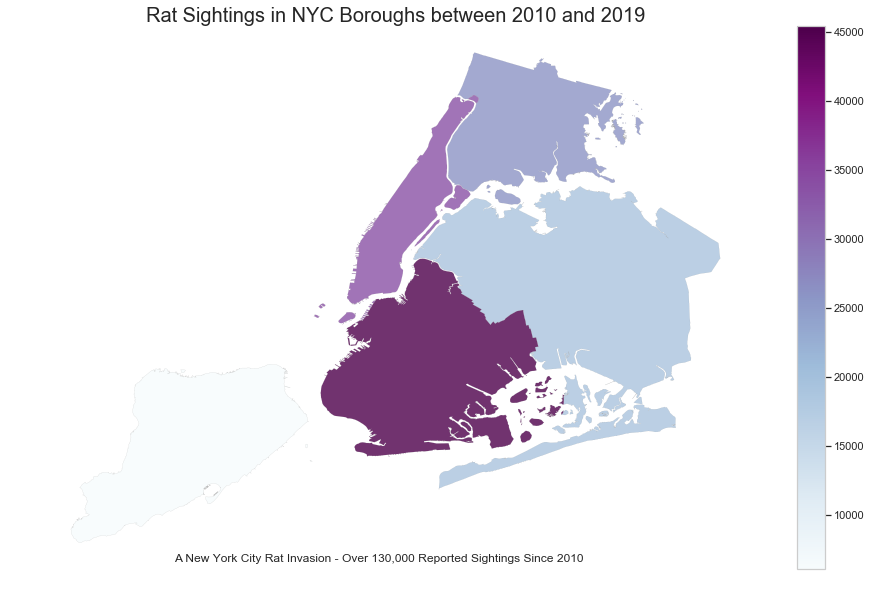

In [145]:
# Setting a variable that will the column we want to visualise on the map
sightings_boro = merged_boro['Number of Sightings']

# Setting a parameters for the graph
colors = 5 # Number of colors to represent the data
cmap = 'BuPu'
figsize = (16, 10)
title = 'Rat Sightings in NYC Boroughs between 2010 and 2019'
imgfile = 'Figures/nyc_rats_sightings_by_boro.png'
annotation = 'A New York City Rat Invasion - Over 130,000 Reported Sightings Since 2010'
ax = merged_boro.plot(column=sightings_boro, cmap=cmap, edgecolor='grey', 
                      linewidth=0.10, alpha=0.8, figsize=figsize, k=colors, legend=True)

ax.set_title(title, fontdict={'fontsize': 20}, loc='center')
ax.annotate(annotation, xy=(0.2, 0.08), size=12, xycoords='figure fraction')

ax.set_axis_off()
#ax.set_xlim([-1.5e7, 1.7e7])
#ax.get_legend().set_bbox_to_anchor((.3, .9))
#ax.get_figure()

plt.savefig(imgfile, dpi=300)

In [146]:
# Summary Analysis
total = rats_by_zip['Number of Sightings'].sum()
max_rats = rats_by_zip['Number of Sightings'].max()
min_rats = rats_by_zip['Number of Sightings'].min()

# Highest number of rats in zip code and borough
max_rats = rats_by_zip.loc[rats_by_zip['Number of Sightings'] == max_rats]
zip_max = max_rats.iloc[0]['Zip Code']
total_max = max_rats.iloc[0]['Number of Sightings']
neighboorhood_max = nyc.loc[nyc['Zip Code'] == zip_max]
max_borough = neighboorhood_max.iloc[0]['borough']

borough_max = rats_by_borough['Number of Sightings'].max()
dirty_borough_results = rats_by_borough.loc[rats_by_borough['Number of Sightings'] == borough_max]
dirty_borough = dirty_borough_results.iloc[0]['Borough']

# Cleanest borough
borough_min = rats_by_borough['Number of Sightings'].min()
clean_borough_results = rats_by_borough.loc[rats_by_borough['Number of Sightings'] == borough_min]
cleanest_boro = clean_borough_results.iloc[0]['Borough']

print('--------------------------------------------------------------------------------------------------')
print(f'Between {min_date} and {max_date} there have been a total of {total} rat sightings in NYC boroughs.')
print(f'The highest number of rats was observed in zip code {zip_max} in {max_borough}, with a total of {total_max} sightings.')
print(f'{dirty_borough} had the highest number of sightings overall, with a total of {total_max} sightings.')
print(f'The cleanest borough was {cleanest_boro} with {borough_min} rat sightings.')
print('--------------------------------------------------------------------------------------------------')


--------------------------------------------------------------------------------------------------
Between 2010-01-01 and 2019-06-10 there have been a total of 130043 rat sightings in NYC boroughs.
The highest number of rats was observed in zip code 11221 in Brooklyn, with a total of 3835 sightings.
Brooklyn had the highest number of sightings overall, with a total of 3835 sightings.
The cleanest borough was Staten Island with 6032 rat sightings.
--------------------------------------------------------------------------------------------------


In [147]:
# Grouping data frame by year and zip code
# First extract the year
rats_df['Year'] = pd.DatetimeIndex(rats_df['Sighting Date']).year
rats_df.head()


,Unnamed: 0,Incident ID,Sighting Date,Complaint Type,Incident,Location Type,Incident Zip,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Latitude,Longitude,Year
0,0,36258648,2017-05-23,Rodent,Rat Sighting,3+ Family Apt. Building,11385,Queens,1006773.0,197332.0,40.708279,-73.918762,2017
1,1,36258650,2017-05-23,Rodent,Rat Sighting,Construction Site,11238,Brooklyn,994534.0,184614.0,40.673394,-73.962926,2017
2,2,32989859,2016-03-25,Rodent,Rat Sighting,Vacant Lot,10473,Bronx,1024132.0,235160.0,40.812046,-73.855925,2016
3,3,33287723,2016-05-05,Rodent,Rat Sighting,1-2 Family Dwelling,10308,Staten Island,945615.0,140332.0,40.551770,-74.139026,2016
4,4,35161193,2017-01-03,Rodent,Rat Sighting,Other (Explain Below),11217,Brooklyn,991375.0,186923.0,40.679734,-73.974312,2017


In [148]:
rats_year_zip = rats_df.groupby(['Year', 'Incident Zip']).count()[['Incident ID']]

In [149]:
rats_year_zip.reset_index(inplace=True)
rats_year_zip.rename(columns={'Incident Zip': 'Zip Code'}, inplace=True)
rats_year_zip.head()

,Year,Zip Code,Incident ID
0,2010,10001,15
1,2010,10002,89
2,2010,10003,97
3,2010,10004,5
4,2010,10006,1


In [150]:
#2010
rats_2010 = rats_year_zip[rats_year_zip['Year'] == 2010]
merged_zip_2010 = pd.merge(nyc, rats_2010, on='Zip Code')
merged_zip_2010.head()

,OBJECTID,Zip Code,PO_NAME,STATE,borough,ST_FIPS,CTY_FIPS,BLDGpostal,_id,longitude,latitude,geometry,Year,Incident ID
0,1,11372,Jackson Heights,NY,Queens,36,081,0,http://nyc.pediacities.com/Resource/PostalCode...,-73.883573,40.751662,POLYGON ((-73.86942457284177 40.74915687096788...,2010,33
1,2,11004,Glen Oaks,NY,Queens,36,081,0,http://nyc.pediacities.com/Resource/PostalCode...,-73.711608,40.745366,POLYGON ((-73.71068374074009 40.75004039450918...,2010,3
2,4,11426,Bellerose,NY,Queens,36,081,0,http://nyc.pediacities.com/Resource/PostalCode...,-73.724004,40.736534,POLYGON ((-73.72270447144122 40.75373371438336...,2010,13
3,5,11365,Fresh Meadows,NY,Queens,36,081,0,http://nyc.pediacities.com/Resource/PostalCode...,-73.794626,40.739903,"POLYGON ((-73.81088634744756 40.7271718757592,...",2010,11
4,6,11373,Elmhurst,NY,Queens,36,081,0,http://nyc.pediacities.com/Resource/PostalCode...,-73.878423,40.738851,POLYGON ((-73.88722098467159 40.72752618766135...,2010,55


In [151]:
# Merging dataframes
merged_zip = pd.merge(nyc, rats_year_zip, on='Zip Code')
merged_zip.head()

,OBJECTID,Zip Code,PO_NAME,STATE,borough,ST_FIPS,CTY_FIPS,BLDGpostal,_id,longitude,latitude,geometry,Year,Incident ID
0,1,11372,Jackson Heights,NY,Queens,36,081,0,http://nyc.pediacities.com/Resource/PostalCode...,-73.883573,40.751662,POLYGON ((-73.86942457284177 40.74915687096788...,2010,33
1,1,11372,Jackson Heights,NY,Queens,36,081,0,http://nyc.pediacities.com/Resource/PostalCode...,-73.883573,40.751662,POLYGON ((-73.86942457284177 40.74915687096788...,2011,24
2,1,11372,Jackson Heights,NY,Queens,36,081,0,http://nyc.pediacities.com/Resource/PostalCode...,-73.883573,40.751662,POLYGON ((-73.86942457284177 40.74915687096788...,2012,31
3,1,11372,Jackson Heights,NY,Queens,36,081,0,http://nyc.pediacities.com/Resource/PostalCode...,-73.883573,40.751662,POLYGON ((-73.86942457284177 40.74915687096788...,2013,25
4,1,11372,Jackson Heights,NY,Queens,36,081,0,http://nyc.pediacities.com/Resource/PostalCode...,-73.883573,40.751662,POLYGON ((-73.86942457284177 40.74915687096788...,2014,41


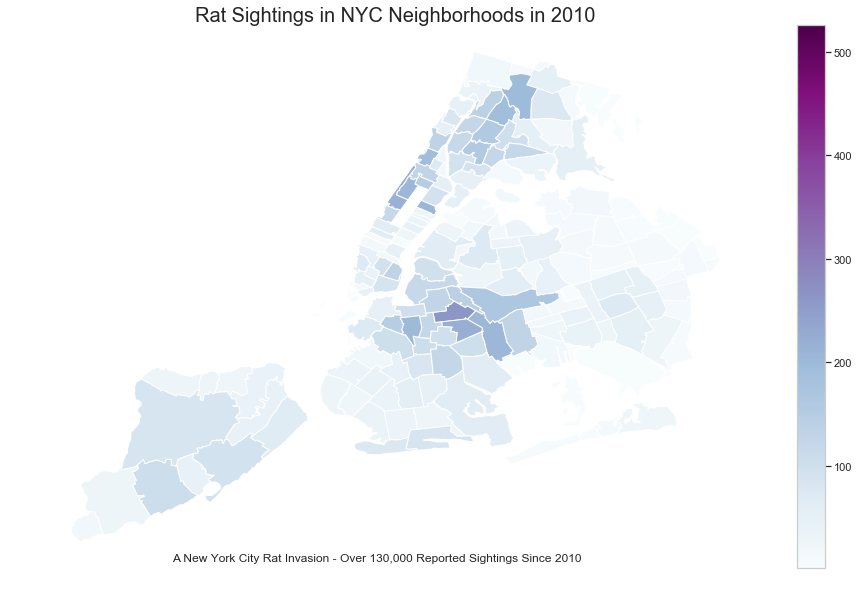

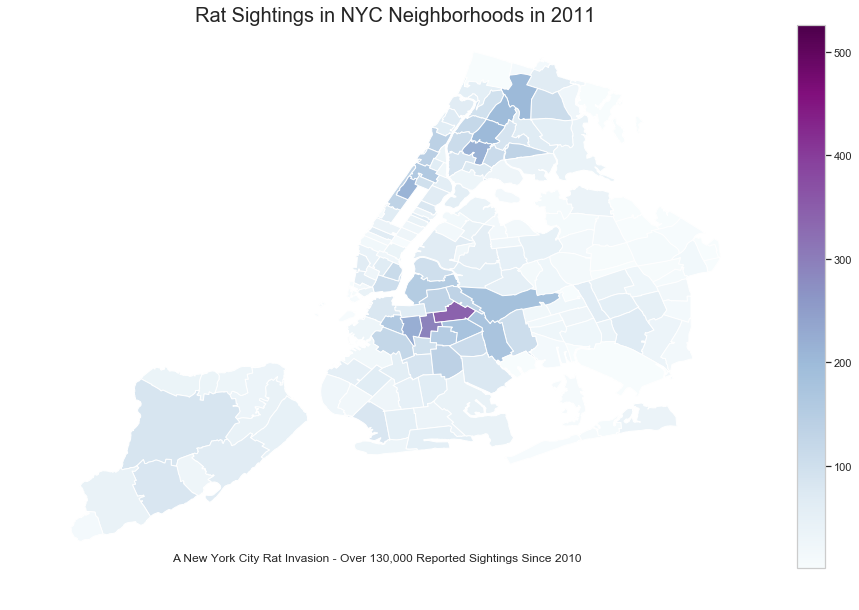

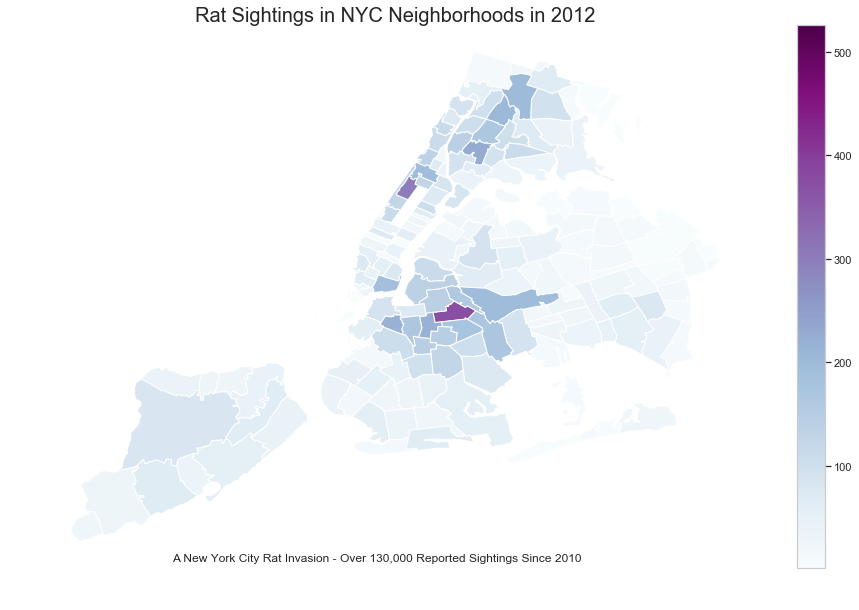

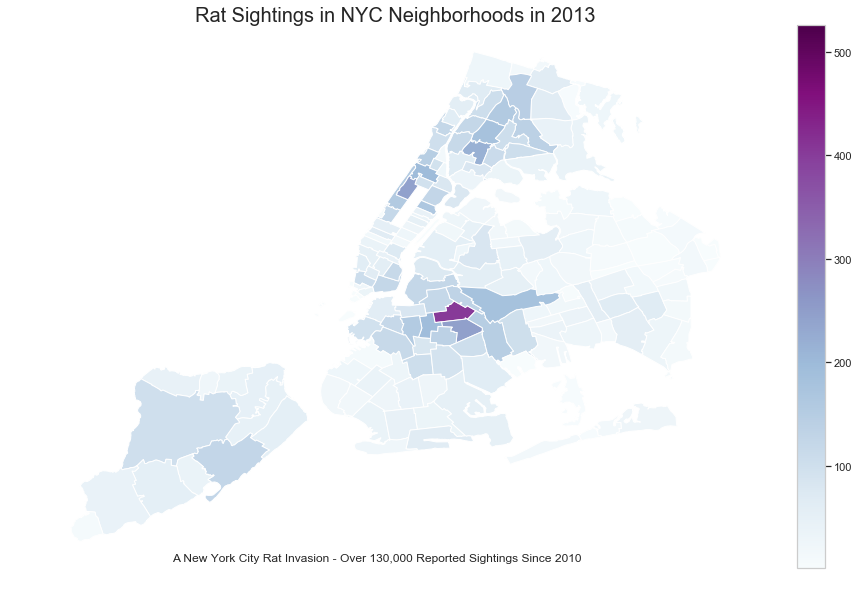

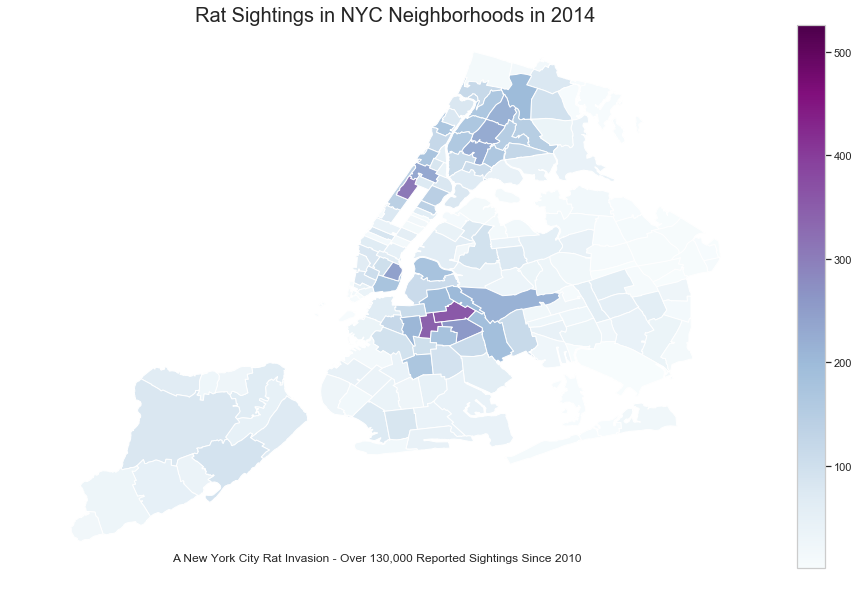

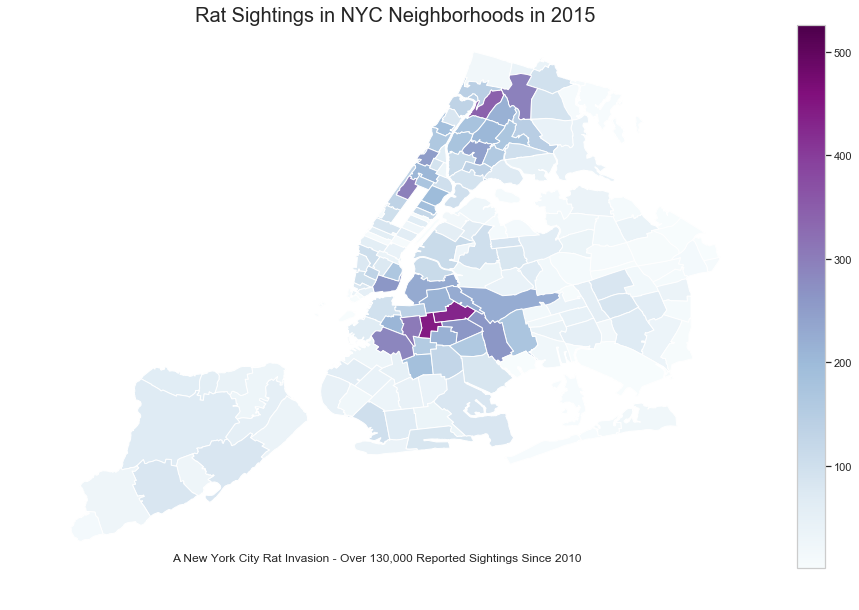

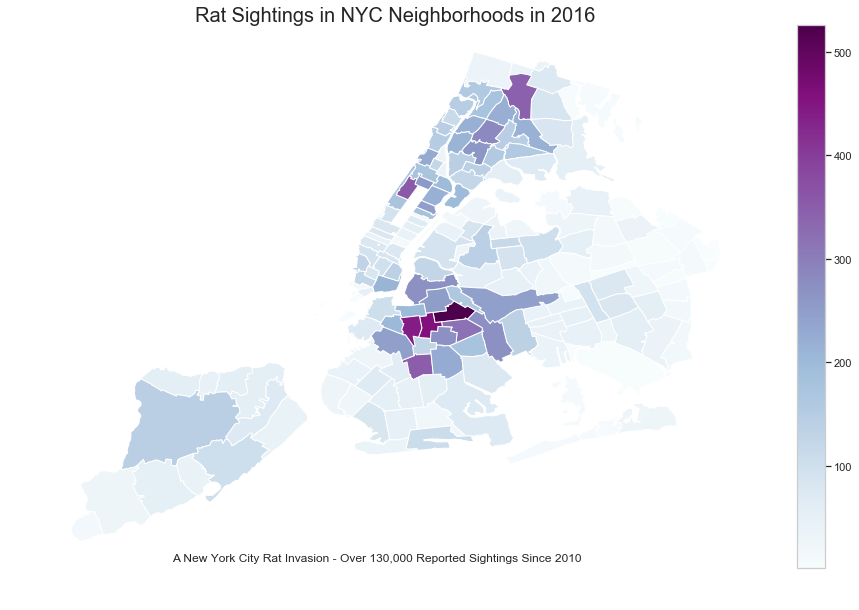

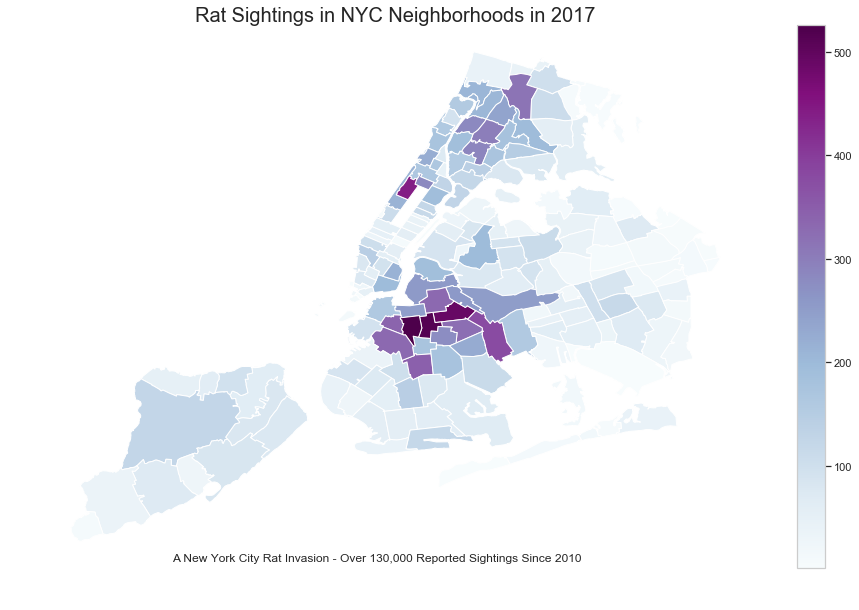

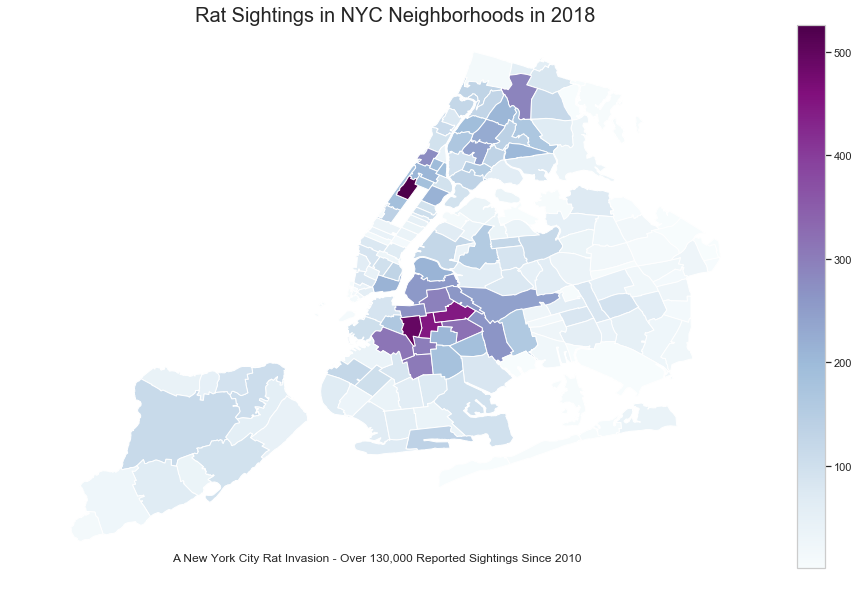

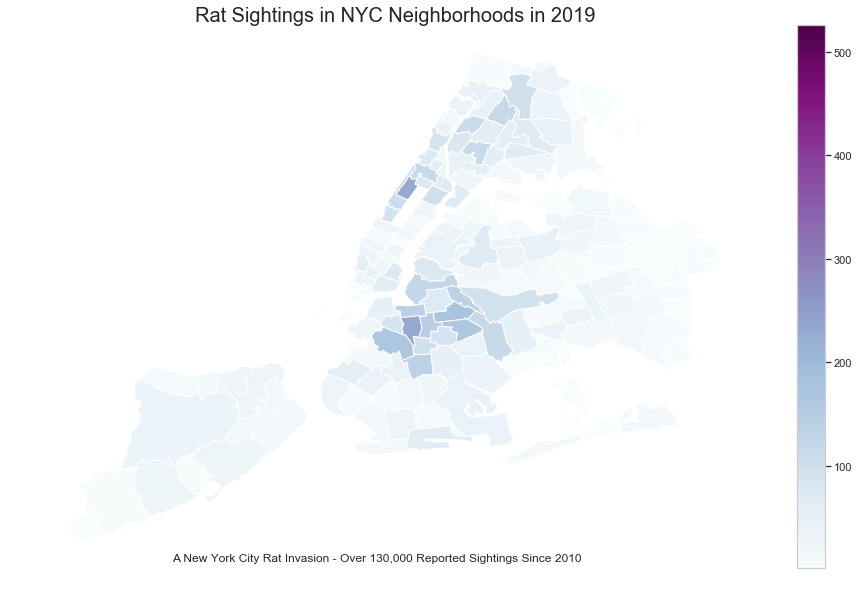

In [152]:
# Generating a map for each year
years = list(merged_zip['Year'].unique())

mx = merged_zip[merged_zip['Year'] == 2018]['Incident ID'].max()
mn = merged_zip[merged_zip['Year'] == 2018]['Incident ID'].min()
colors = 10 # Number of colors to represent the data
cmap = 'BuPu'
figsize = (16, 10)

for year in years:
    
    title = f'Rat Sightings in NYC Neighborhoods in {year}'
    imgfile = f'Figures/nyc_rats_sightings_{year}.png'
    annotation = 'A New York City Rat Invasion - Over 130,000 Reported Sightings Since 2010'
    
    merged_year = merged_zip[merged_zip['Year'] == year]
    
    ax = merged_year.plot(column=merged_year['Incident ID'], cmap=cmap, vmin=mn, vmax=mx, figsize=figsize, k=colors, legend=True)
    
    ax.set_title(title, fontdict={'fontsize': 20}, loc='center')
    ax.annotate(annotation, xy=(0.2, 0.08), size=12, xycoords='figure fraction')
    
    ax.set_axis_off()

    plt.savefig(imgfile, dpi=300)

In [153]:
tot_yearly_rat = []
years = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
Temp_diff = [0.0, -0.20273972602739576, 1.1455423310127983, -1.342465753424655, -1.989041095890407, -0.11232876712328732, 0.6974548993188137, 0.06575342465753664, -0.830136986301369]

for year in years:
    tot_yearly_rat.append(rats_year_zip[rats_year_zip['Year'] == year]['Incident ID'].sum())

print(tot_yearly_rat)
print(Temp_diff)

[10447, 10393, 10563, 10669, 12537, 15188, 17069, 18991, 17229]
[0.0, -0.20273972602739576, 1.1455423310127983, -1.342465753424655, -1.989041095890407, -0.11232876712328732, 0.6974548993188137, 0.06575342465753664, -0.830136986301369]


In [154]:
rat_diff = []
for i in range(len(tot_yearly_rat)):
    rat_diff.append(tot_yearly_rat[i] - tot_yearly_rat[0])

print(rat_diff)

[0, -54, 116, 222, 2090, 4741, 6622, 8544, 6782]


In [155]:
table = {'Year': years, 'Sightings Difference': rat_diff, 'Temperature Difference': Temp_diff}
df = pd.DataFrame(table)
df

,Year,Sightings Difference,Temperature Difference
0,2010,0,0.000000
1,2011,-54,-0.202740
2,2012,116,1.145542
3,2013,222,-1.342466
4,2014,2090,-1.989041
5,2015,4741,-0.112329
6,2016,6622,0.697455
7,2017,8544,0.065753
8,2018,6782,-0.830137


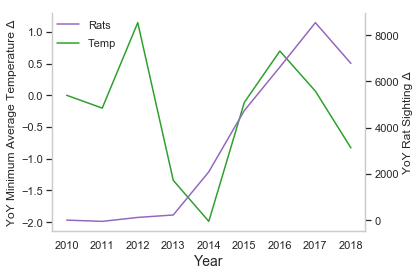

In [156]:
fig, ax= plt.subplots()

sns.set(style='whitegrid', rc={"grid.linewidth": 0.1})

x = df['Year']
y1 = df['Temperature Difference']
y2 = df['Sightings Difference']

color = 'tab:green'
ax1 = sns.lineplot(x, y1, data=df, color=color, label='Temp')
ax1.grid(False)
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('YoY Minimum Average Temperature Δ', fontsize=12)

plt.legend(bbox_to_anchor=(0, .90), loc=2, borderaxespad=0, frameon=False)

sns.despine(top=True, right=False, left=False, bottom=False)

# instantiate a second axes that shares the same x-axis
ax2 = ax1.twinx()

color = 'tab:purple'
ax2 = sns.lineplot(x, y2, data=df, color=color, label='Rats')
ax2.grid(False)
ax2.set_ylabel('YoY Rat Sighting Δ', fontsize=12)

plt.legend(bbox_to_anchor=(0, .90), loc=3, borderaxespad=0, frameon=False)
plt.tight_layout()

sns.despine(top=True, right=False, left=False, bottom=False)

plt.savefig('Figures/rat_v_temp_change.png', dpi=300)


In [157]:
# Summary Analysis
total = rats_by_zip['Number of Sightings'].sum()
max_rats = rats_by_zip['Number of Sightings'].max()
min_rats = rats_by_zip['Number of Sightings'].min()

# Highest number of rats in zip code and borough
max_rats = rats_by_zip.loc[rats_by_zip['Number of Sightings'] == max_rats]
zip_max = max_rats.iloc[0]['Zip Code']
total_max = max_rats.iloc[0]['Number of Sightings']
neighboorhood_max = nyc.loc[nyc['Zip Code'] == zip_max]
max_borough = neighboorhood_max.iloc[0]['borough']

borough_max = rats_by_borough['Number of Sightings'].max()
dirty_borough_results = rats_by_borough.loc[rats_by_borough['Number of Sightings'] == borough_max]
dirty_borough = dirty_borough_results.iloc[0]['Borough']

# Cleanest borough
borough_min = rats_by_borough['Number of Sightings'].min()
clean_borough_results = rats_by_borough.loc[rats_by_borough['Number of Sightings'] == borough_min]
cleanest_boro = clean_borough_results.iloc[0]['Borough']

print('--------------------------------------------------------------------------------------------------')
print(f'Between {min_date} and {max_date} there have been a total of {total} rat sightings in NYC boroughs.')
print(f'The highest number of rats was observed in zip code {zip_max} in {max_borough}, with a total of {total_max} sightings.')
print(f'{dirty_borough} had the highest number of sightings overall, with a total of {total_max} sightings.')
print(f'The cleanest borough was {cleanest_boro} with {borough_min} rat sightings.')
print('--------------------------------------------------------------------------------------------------')

--------------------------------------------------------------------------------------------------
Between 2010-01-01 and 2019-06-10 there have been a total of 130043 rat sightings in NYC boroughs.
The highest number of rats was observed in zip code 11221 in Brooklyn, with a total of 3835 sightings.
Brooklyn had the highest number of sightings overall, with a total of 3835 sightings.
The cleanest borough was Staten Island with 6032 rat sightings.
--------------------------------------------------------------------------------------------------
